# Preamble

importing

In [2]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn.datasets import make_blobs

from sklearn.inspection import DecisionBoundaryDisplay



Making test data

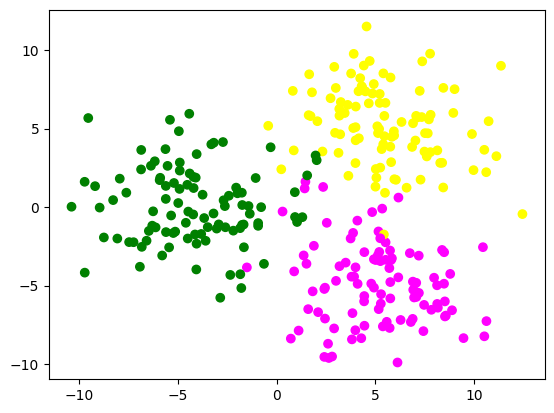

In [3]:
centers=[[-5, 0], [5, 5], [5, -5]]
blobs = make_blobs(centers=centers, cluster_std= 2.5, n_samples=300, random_state=504)

X, y = blobs

colors = ListedColormap(["green", "yellow", "magenta"])

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=colors)

# Fitting a KNN model
Creating and fitting on the data. I didn't create train and test sets. This is only for visualization.

In [4]:

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X, y)

KNeighborsClassifier()

The position in the center is predicted as magenta.

In [5]:
knn.predict([[0, 0]])

array([0])

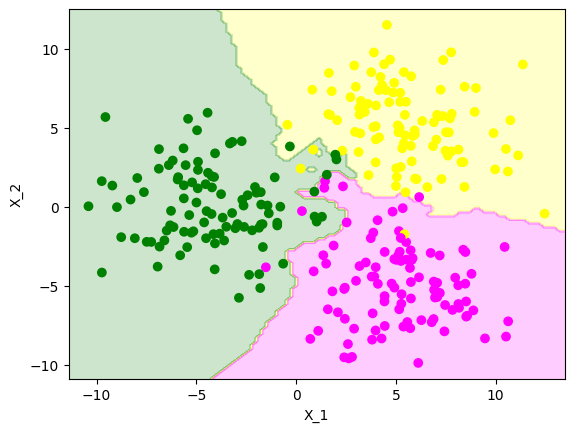

In [6]:
DecisionBoundaryDisplay.from_estimator(knn, X, alpha=.2, cmap=colors, xlabel='X_1', ylabel='X_2')
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=colors)


# A harder example

Let's try creating a harder example

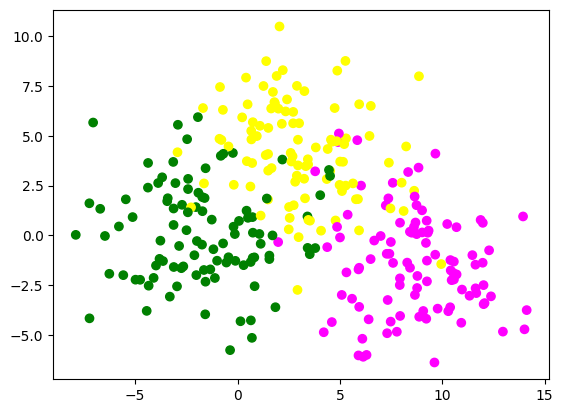

In [7]:
blobs = make_blobs(centers=[[-2.5, 0], [2.5, 4], [8.5, -1.5]], cluster_std= 2.5, n_samples=300, random_state=504)

X, y = blobs

colors = ListedColormap(["green", "yellow", "magenta"])

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=colors)

In [8]:

knn = KNeighborsClassifier()
knn.fit(X, y)

KNeighborsClassifier()

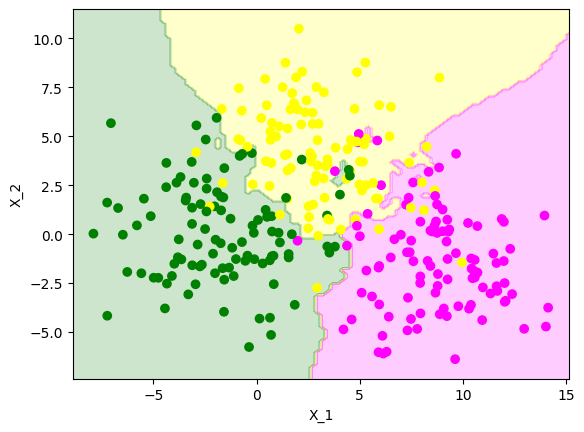

In [9]:
DecisionBoundaryDisplay.from_estimator(knn, X, alpha=.2, cmap=colors, xlabel='X_1', ylabel='X_2')
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=colors)


# Hyperparameters

Let's try tuning the hyperparameters to get a more precise result.

What happens if we just use the nearest neighbour?

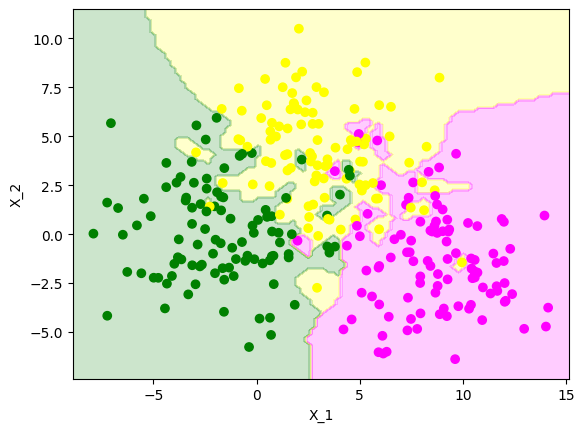

In [10]:

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X, y)
DecisionBoundaryDisplay.from_estimator(knn, X, alpha=.2, cmap=colors, xlabel='X_1', ylabel='X_2')
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=colors)


Maybe not so surprising. Looking at only one neighbour makes the model much more sensitive to noise and with a higher tendency to overfit.

Let's go the other way. Try 5.

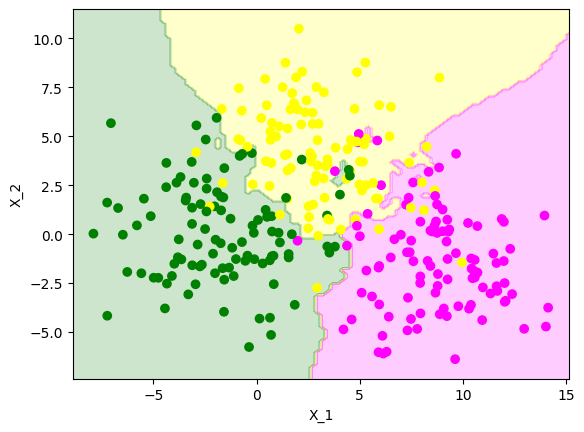

In [11]:

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X, y)
DecisionBoundaryDisplay.from_estimator(knn, X, alpha=.2, cmap=colors, xlabel='X_1', ylabel='X_2')
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=colors)


Many of the islands have disappeared, but the boundary still looks weird.

Let's go crazy: 11 neighbors.

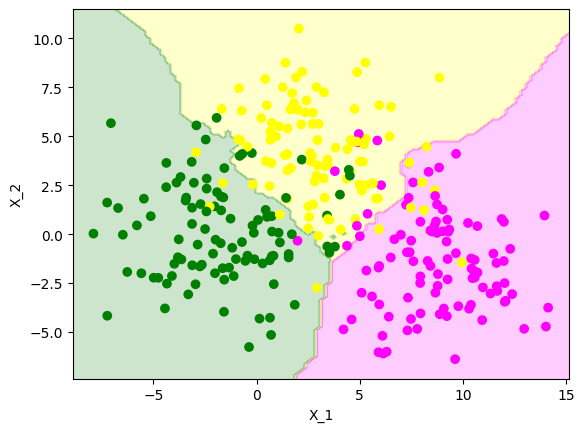

In [12]:

knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(X, y)
DecisionBoundaryDisplay.from_estimator(knn, X, alpha=.2, cmap=colors, xlabel='X_1', ylabel='X_2')
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=colors)


It looks better, but using a high number of neighbours risks missing some islands that "should" be there. Also note the place where a high concentration of magenta dots pushes the border into the yellow area.

As usual, the only answer it to measure it against a test set, but we won't do it here.